# Convolutional Neural Network



### Training using Keras

In [1]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer

In [2]:
print('[INFO] loading CIFAR-10 data...' )
((trainX, trainY), (testX, testY)) = cifar10.load_data()

print('train X shape', trainX.shape)
print('trian Y shape', trainY.shape)
print('test X shape', testX.shape)
print('test Y shape', testY.shape)

trainX = trainX.astype('float')/255.0
testX = testX.astype('float')/255.0
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

[INFO] loading CIFAR-10 data...
train X shape (50000, 32, 32, 3)
trian Y shape (50000, 1)
test X shape (10000, 32, 32, 3)
test Y shape (10000, 1)


In [3]:
labelNames = ['airplance', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (5, 5), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [5]:
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [6]:
H = model.fit(trainX, trainY, validation_data = (testX, testY), batch_size = 250, epochs= 100, verbose = 1)

Epoch 1/100
200/200 [==============================] - 17s 27ms/step - loss: 1.6775 - accuracy: 0.3958 - val_loss: 1.4240 - val_accuracy: 0.4919
Epoch 2/100
200/200 [==============================] - 5s 23ms/step - loss: 1.3635 - accuracy: 0.5149 - val_loss: 1.3483 - val_accuracy: 0.5140
Epoch 3/100
200/200 [==============================] - 5s 24ms/step - loss: 1.2189 - accuracy: 0.5719 - val_loss: 1.2275 - val_accuracy: 0.5673
Epoch 4/100
200/200 [==============================] - 5s 25ms/step - loss: 1.1311 - accuracy: 0.6077 - val_loss: 1.1334 - val_accuracy: 0.5978
Epoch 5/100
200/200 [==============================] - 5s 23ms/step - loss: 1.0557 - accuracy: 0.6340 - val_loss: 1.1031 - val_accuracy: 0.6190
Epoch 6/100
200/200 [==============================] - 5s 25ms/step - loss: 1.0018 - accuracy: 0.6551 - val_loss: 0.9958 - val_accuracy: 0.6577
Epoch 7/100
200/200 [==============================] - 5s 25ms/step - loss: 0.9524 - accuracy: 0.6719 - val_loss: 1.0090 - val_accuracy

In [7]:
X_new = testX[:3]
y_pred = model.predict(X_new)
print(y_pred)

[[6.17884609e-07 4.84934072e-11 2.39646458e-09 9.99868870e-01
  2.54816251e-10 1.30022003e-04 4.77041851e-07 1.28693473e-10
  8.05656583e-11 8.18396566e-12]
 [1.08313282e-12 1.00166805e-03 1.76028561e-16 1.07218969e-23
  2.51776125e-25 8.97343845e-29 1.67696498e-27 2.46501290e-28
  9.98998344e-01 3.61988273e-10]
 [9.61043952e-07 7.14342017e-03 7.57262655e-11 2.01748573e-09
  1.22349117e-10 3.69364392e-12 2.05070316e-09 1.09153156e-07
  9.92846429e-01 9.11585357e-06]]


# Training on Mnist-cloth

In [8]:
import numpy as np
import os
import sys
assert sys.version_info >= (3,5)

import sklearn
import matplotlib as mpl 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

In [9]:
from matplotlib.projections import ProjectionRegistry
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = 'ann'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print('Saving figure', fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

tf.__version__
keras.__version__

'2.8.0'

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print('X train full shape', X_train_full.shape)
print('y train full shape', y_train_full.shape)
print('X test shape', X_test.shape)
print('y test shape', y_test.shape)

X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255.


4431872/4422102 [==============================] - 0s 0us/step
X train full shape (60000, 28, 28)
y train full shape (60000,)
X test shape (10000, 28, 28)
y test shape (10000,)


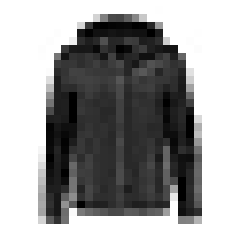

In [11]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
y_train[0]

4

In [14]:
class_names[y_train[0]]

'Coat'

Saving figure fashion_mnist_plot


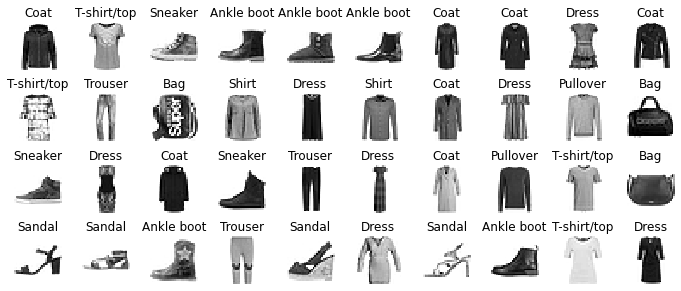

In [15]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
                                keras.layers.Flatten(input_shape=[28, 28]),
                                keras.layers.Dense(300, activation='relu'),
                                keras.layers.Dense(100, activation='relu'),
                                keras.layers.Dense(10, activation='softmax')
])
model.layers 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras.utils.vis_utils import plot_model


#plot_model(model, 'my_fashion_mnist_model.png')

hidden1 = model.layers[1]
print('hidden1.name', hidden1.name) 

model.get_layer(hidden1.name) is hidden1

weights, biases = hidden1.get_weights()
print('weights', weights)
print('weights shape',weights.shape)
print('biases',biases)
print('biases shape',biases.shape)

hidden1.name dense
weights [[ 0.02448617 -0.00877795 -0.02189048 ... -0.02766046  0.03859074
  -0.06889391]
 [ 0.00476504 -0.03105379 -0.0586676  ...  0.00602964 -0.02763776
  -0.04165364]
 [-0.06189284 -0.06901957  0.07102345 ... -0.04238207  0.07121518
  -0.07331658]
 ...
 [-0.03048757  0.02155137 -0.05400612 ... -0.00113463  0.00228987
   0.05581069]
 [ 0.07061854 -0.06960931  0.07038955 ... -0.00384101  0.00034875
   0.02878492]
 [-0.06022581  0.01577859 -0.02585464 ... -0.00527829  0.00272203
  -0.06793761]]
weights shape (784, 300)
biases [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5209 - val_accuracy: 0.8222
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4344 - val_accuracy: 0.8536
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4390 - accuracy: 0.8456 - val_loss: 0.5260 - val_accuracy: 0.8010
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4123 - accuracy: 0.8567 - val_loss: 0.3915 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3940 - accuracy: 0.8621 - val_loss: 0.3742 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3750 - accuracy: 0.8676 - val_loss: 0.3704 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3631 - accuracy: 0.8711 - val_loss: 0.3615 - val_accuracy:

In [20]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [21]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


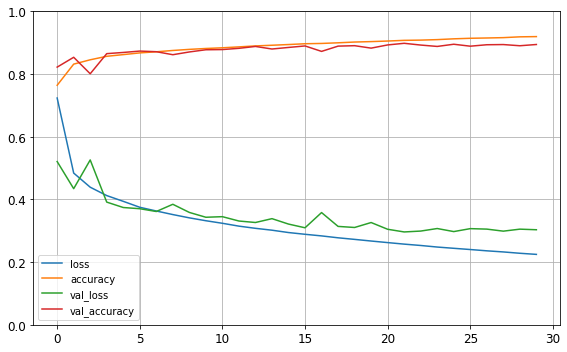

In [22]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig('keras_learning_curves_plot')
plt.show()

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))
y_pred = np.argmax(y_proba, axis=1)
print(y_pred)
print(np.array(class_names)[y_pred])

[[0.   0.   0.   0.   0.   0.01 0.   0.03 0.   0.96]
 [0.   0.   0.98 0.   0.02 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [24]:
y_new = y_test[:3]
print(y_new)

[9 2 1]


Saving figure fashion_mnist_images_plot


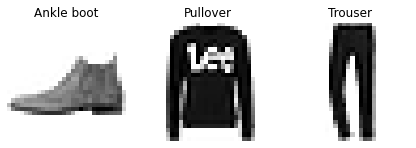

In [25]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
  plt.subplot(1, 3, index + 1)
  plt.imshow(image, cmap='binary', interpolation='nearest')
  plt.axis('off')
  plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# HomeWork

In the above training, the model does not have CNN, it use only fully connected layers. So, CNN were be used first, then followed by fc layers in this model. And compare the results.

In [26]:
print('X train  shape', X_train.shape)
print('X val shape', X_valid.shape)
print('X test shape', X_test.shape)

X train  shape (55000, 28, 28)
X val shape (5000, 28, 28)
X test shape (10000, 28, 28)


In [27]:
X_train = X_train.reshape((55000, 28, 28, 1))
X_valid = X_valid.reshape((5000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

print('X train  shape', X_train.shape)
print('X val shape', X_valid.shape)
print('X test shape', X_test.shape)

X train  shape (55000, 28, 28, 1)
X val shape (5000, 28, 28, 1)
X test shape (10000, 28, 28, 1)


In [28]:
np.random.seed(42)
tf.random.set_seed(42)
model_cnn = keras.models.Sequential([
                                keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                                keras.layers.MaxPooling2D((2,2)),
                                keras.layers.Conv2D(128, (3,3), activation='relu'),
                                keras.layers.MaxPooling2D((2, 2)),
                                keras.layers.Flatten(),
                                keras.layers.Dense(300, activation='relu'),
                                keras.layers.Dense(100, activation='relu'),
                                keras.layers.Dense(10, activation='softmax')
])
model_cnn.layers 
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_3 (Dense)             (None, 300)              

In [29]:
model_cnn.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [30]:
history_cnn = model_cnn.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8905 - accuracy: 0.6827 - val_loss: 0.6484 - val_accuracy: 0.7678
Epoch 2/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5382 - accuracy: 0.7977 - val_loss: 0.4546 - val_accuracy: 0.8398
Epoch 3/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4574 - accuracy: 0.8311 - val_loss: 0.4899 - val_accuracy: 0.8030
Epoch 4/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4107 - accuracy: 0.8508 - val_loss: 0.3762 - val_accuracy: 0.8678
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3800 - accuracy: 0.8609 - val_loss: 0.3679 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3546 - accuracy: 0.8691 - val_loss: 0.3332 - val_accuracy: 0.8808
Epoch 7/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3366 - accuracy: 0.8769 - val_loss: 0.3462 - val_ac

Saving figure keras_CNN_learning_curves_plot


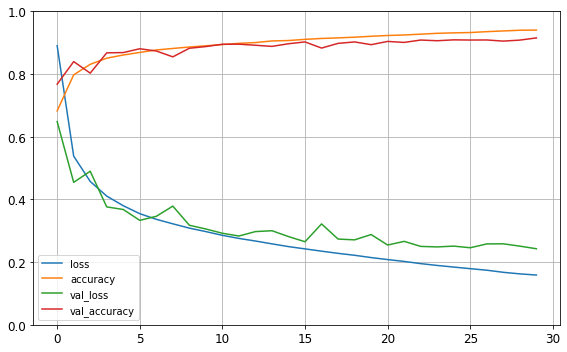

In [31]:
import pandas as pd

pd.DataFrame(history_cnn.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig('keras_CNN_learning_curves_plot')
plt.show()

The validation accuracy increased from 0.8944 to 0.9154 when the model has CNN layers.